In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
Crema_Path = '/content/drive/MyDrive/speech/archive (1)/Crema'
Ravdess_Path = '/content/drive/MyDrive/speech/archive (1)/Ravdess/audio_speech_actors_01-24'
Savee_Path = '/content/drive/MyDrive/speech/archive (1)/Savee'
Tess_Path = '/content/drive/MyDrive/speech/archive (1)/Tess'

In [12]:
crema=[]
for wav in os.listdir(Crema_Path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema_Path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema_Path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema_Path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema_Path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema_Path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema_Path+'/'+wav))
    else:
        crema.append(('unknown',Crema_Path+'/'+wav))
Crema_df=pd.DataFrame.from_dict(crema)
Crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Crema_df.head()


,Emotion,File_Path
0,sad,/content/drive/MyDrive/speech/archive (1)/Crem...
1,angry,/content/drive/MyDrive/speech/archive (1)/Crem...
2,sad,/content/drive/MyDrive/speech/archive (1)/Crem...
3,fear,/content/drive/MyDrive/speech/archive (1)/Crem...
4,happy,/content/drive/MyDrive/speech/archive (1)/Crem...


In [13]:
Crema_df['Emotion'].unique()

array(['sad', 'angry', 'fear', 'happy', 'disgust', 'neutral'],
      dtype=object)

In [14]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,neutral,/content/drive/MyDrive/speech/archive (1)/Ravd...
1,happy,/content/drive/MyDrive/speech/archive (1)/Ravd...
2,happy,/content/drive/MyDrive/speech/archive (1)/Ravd...
3,neutral,/content/drive/MyDrive/speech/archive (1)/Ravd...
4,happy,/content/drive/MyDrive/speech/archive (1)/Ravd...


In [15]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'angry', 'sad', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [16]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,angry,/content/drive/MyDrive/speech/archive (1)/Save...
1,disgust,/content/drive/MyDrive/speech/archive (1)/Save...
2,angry,/content/drive/MyDrive/speech/archive (1)/Save...
3,disgust,/content/drive/MyDrive/speech/archive (1)/Save...
4,disgust,/content/drive/MyDrive/speech/archive (1)/Save...


In [17]:
Savee_df['Emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

In [18]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,disgust,/content/drive/MyDrive/speech/archive (1)/Tess...
1,disgust,/content/drive/MyDrive/speech/archive (1)/Tess...
2,disgust,/content/drive/MyDrive/speech/archive (1)/Tess...
3,disgust,/content/drive/MyDrive/speech/archive (1)/Tess...
4,disgust,/content/drive/MyDrive/speech/archive (1)/Tess...


In [19]:
Tess_df['Emotion'].unique()

array(['disgust', 'surprise', 'neutral', 'angry', 'sad', 'fear', 'happy'],
      dtype=object)

In [20]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [21]:
main_df.head(15)

,Emotion,File_Path
0,sad,/content/drive/MyDrive/speech/archive (1)/Crem...
1,angry,/content/drive/MyDrive/speech/archive (1)/Crem...
2,sad,/content/drive/MyDrive/speech/archive (1)/Crem...
3,fear,/content/drive/MyDrive/speech/archive (1)/Crem...
4,happy,/content/drive/MyDrive/speech/archive (1)/Crem...
5,fear,/content/drive/MyDrive/speech/archive (1)/Crem...
6,angry,/content/drive/MyDrive/speech/archive (1)/Crem...
7,fear,/content/drive/MyDrive/speech/archive (1)/Crem...
8,happy,/content/drive/MyDrive/speech/archive (1)/Crem...
9,disgust,/content/drive/MyDrive/speech/archive (1)/Crem...


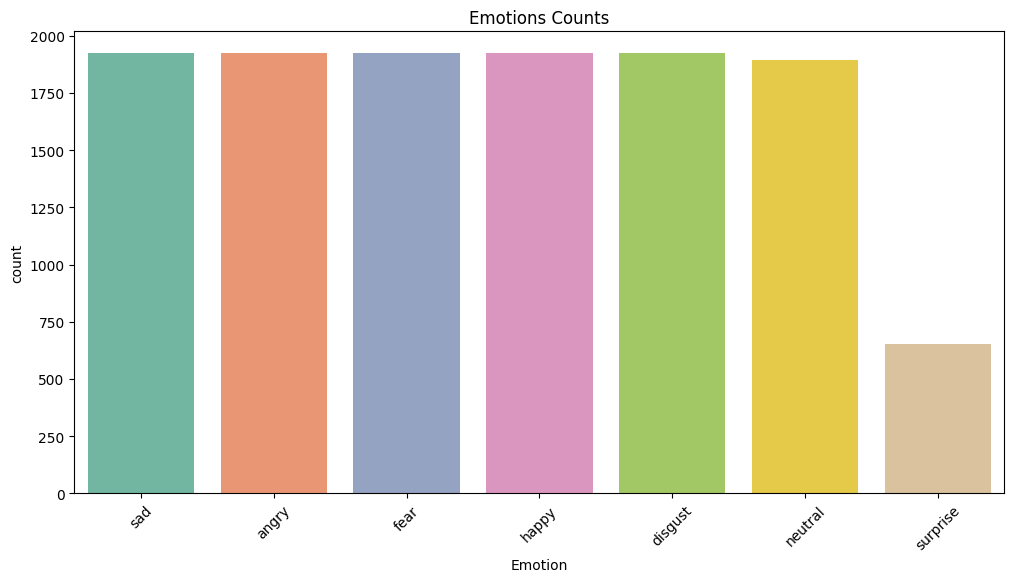

In [22]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()


In [23]:
emotion_names=main_df['Emotion'].unique()
emotion_names

array(['sad', 'angry', 'fear', 'happy', 'disgust', 'neutral', 'surprise'],
      dtype=object)

In [24]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [25]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [26]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

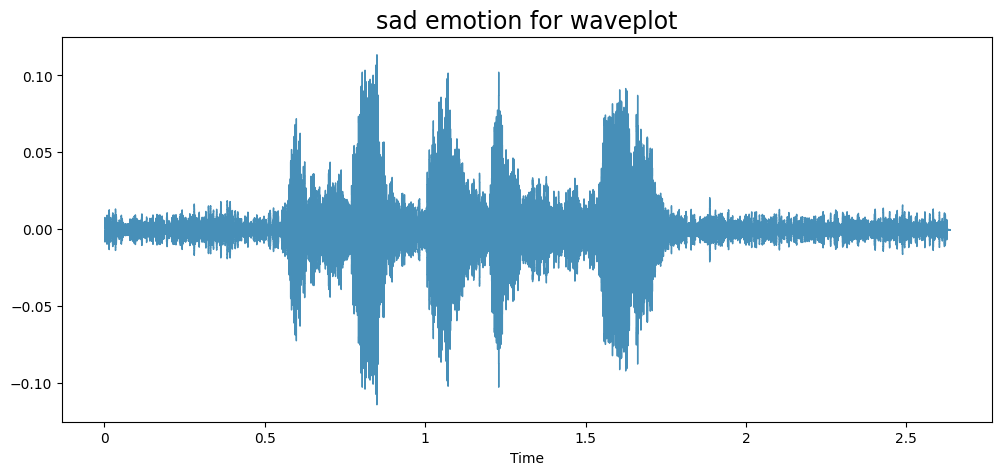

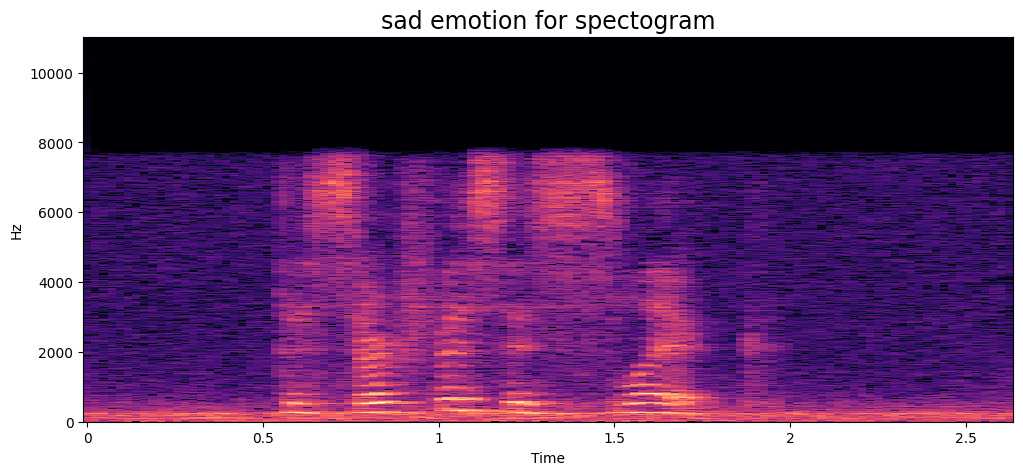

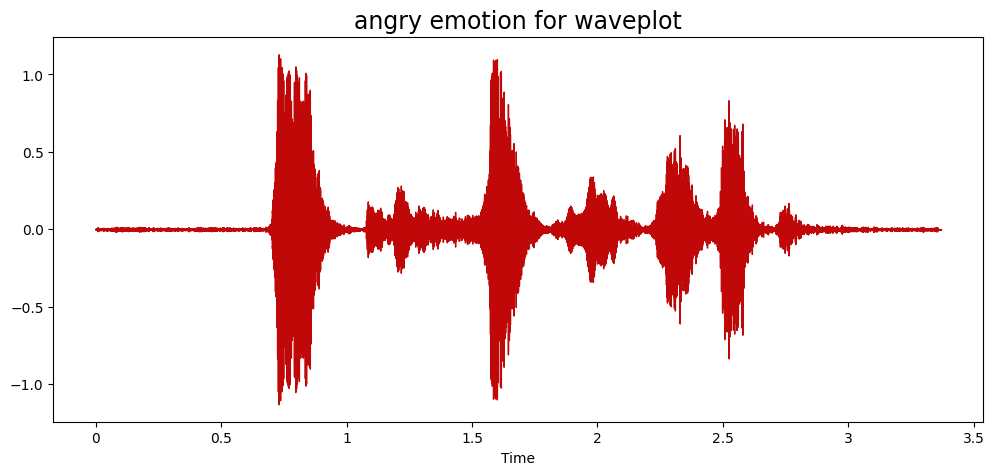

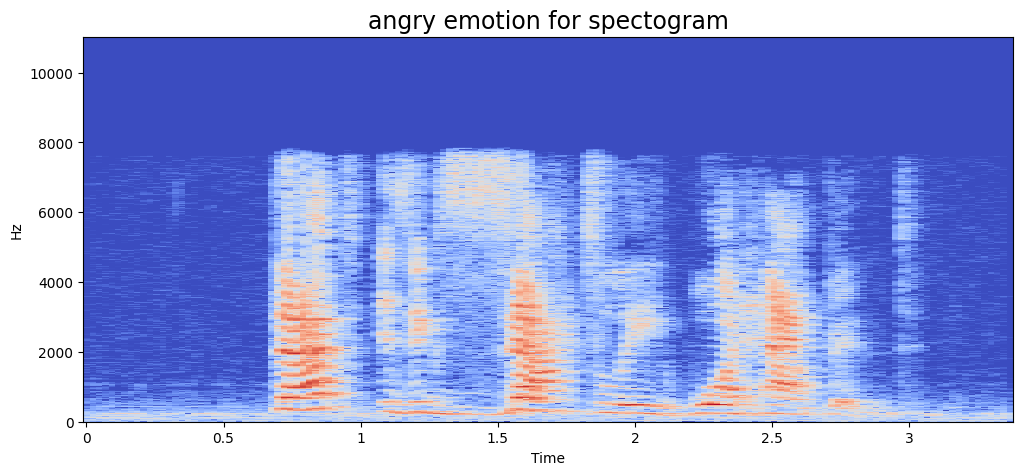

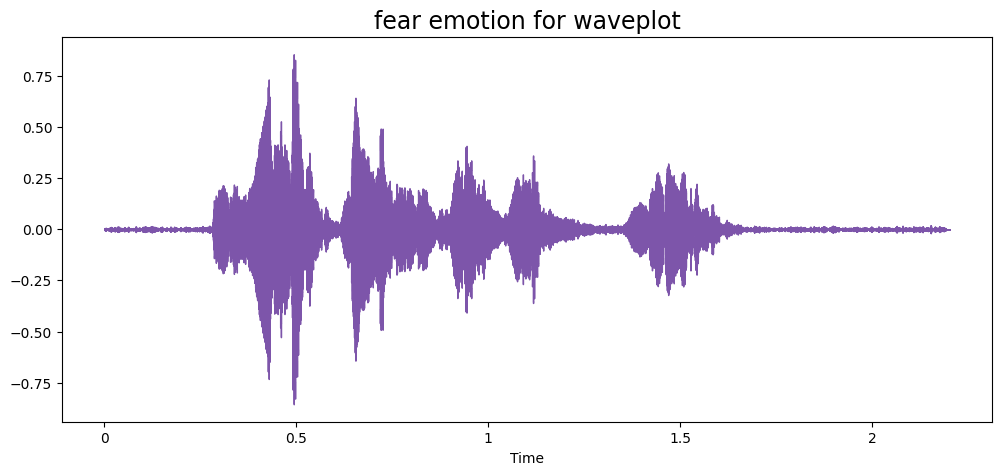

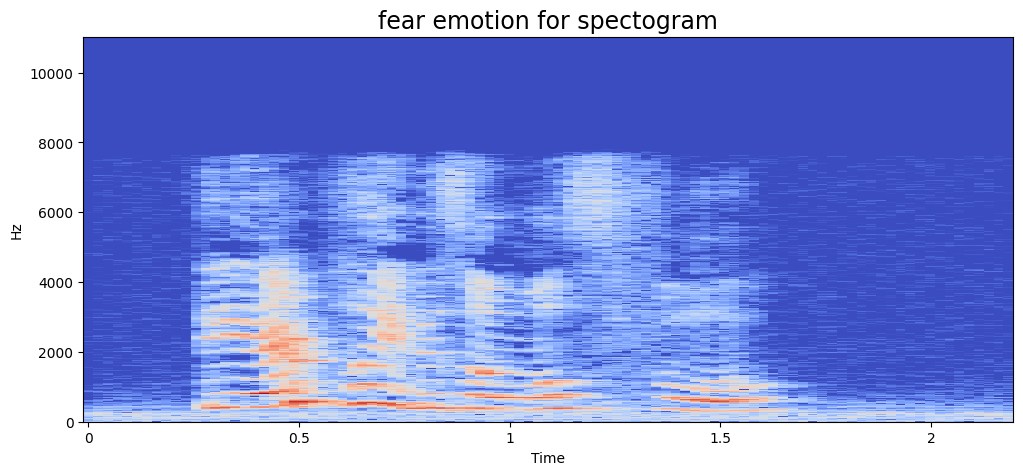

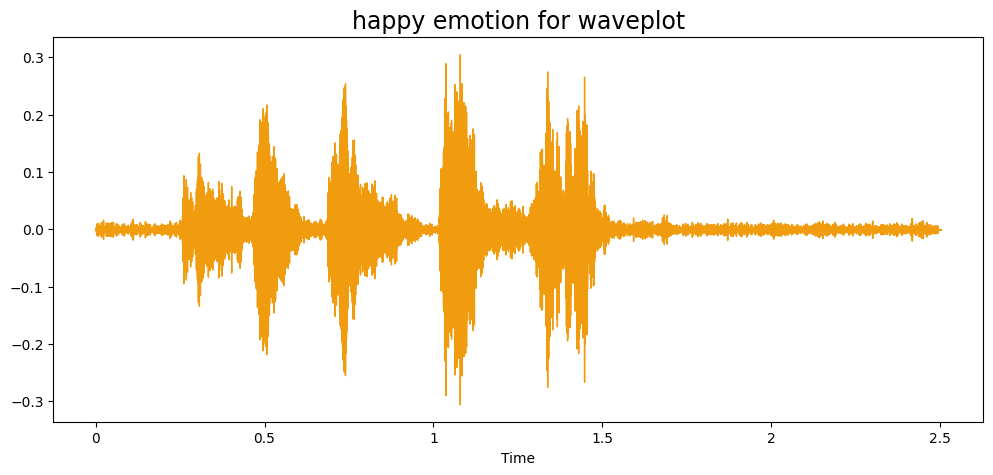

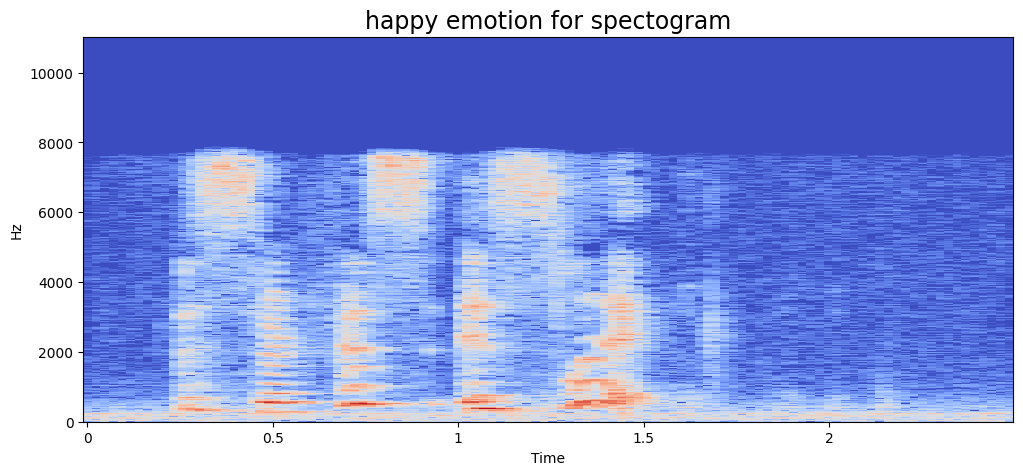

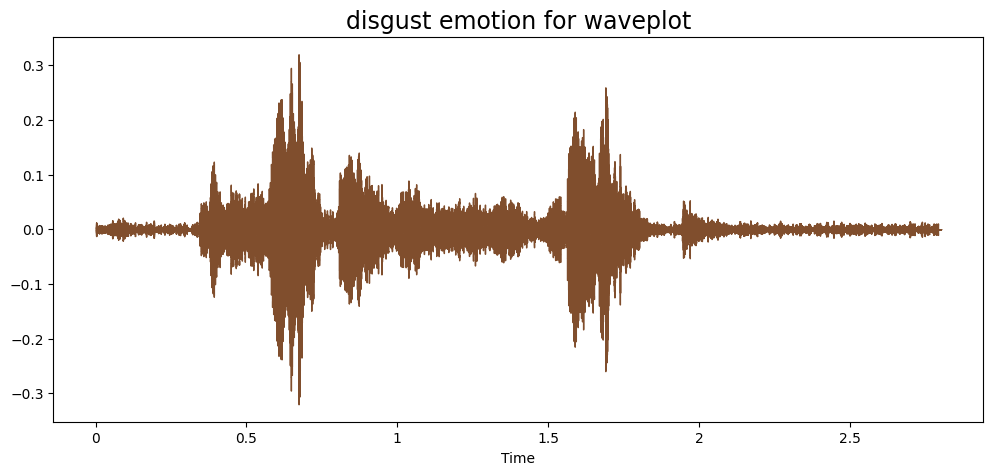

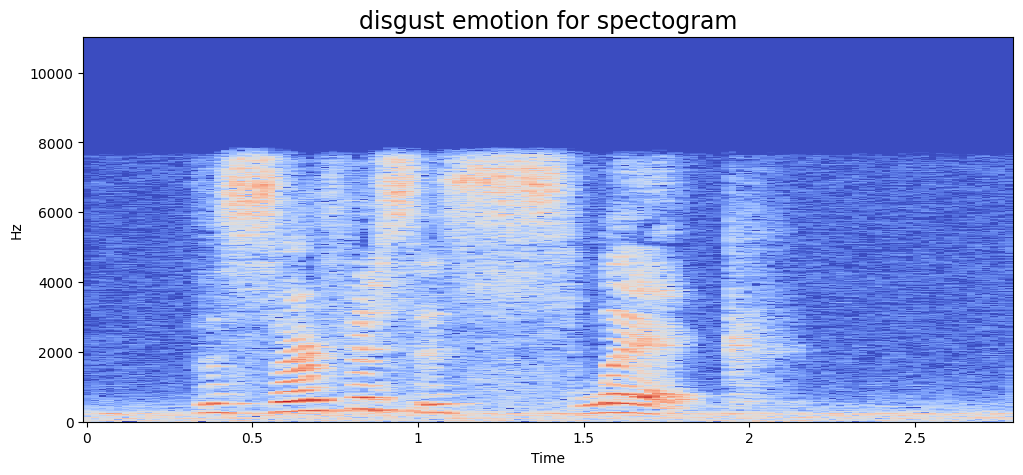

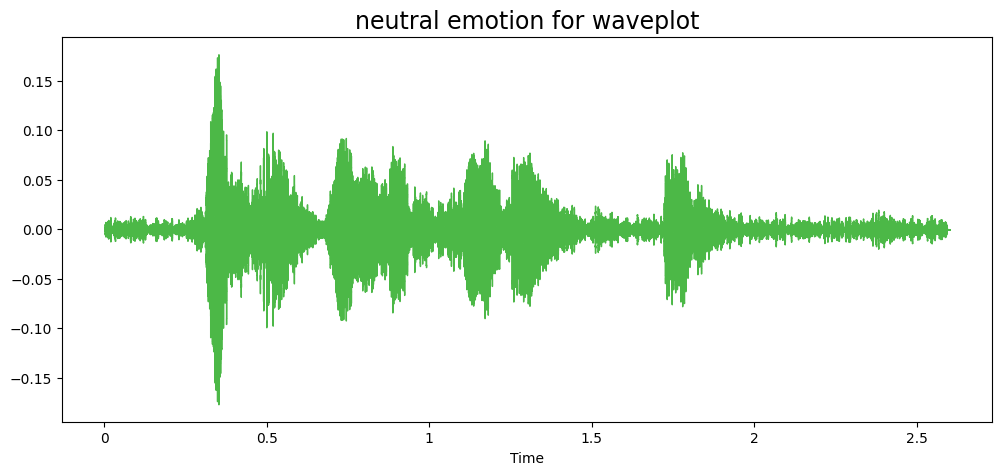

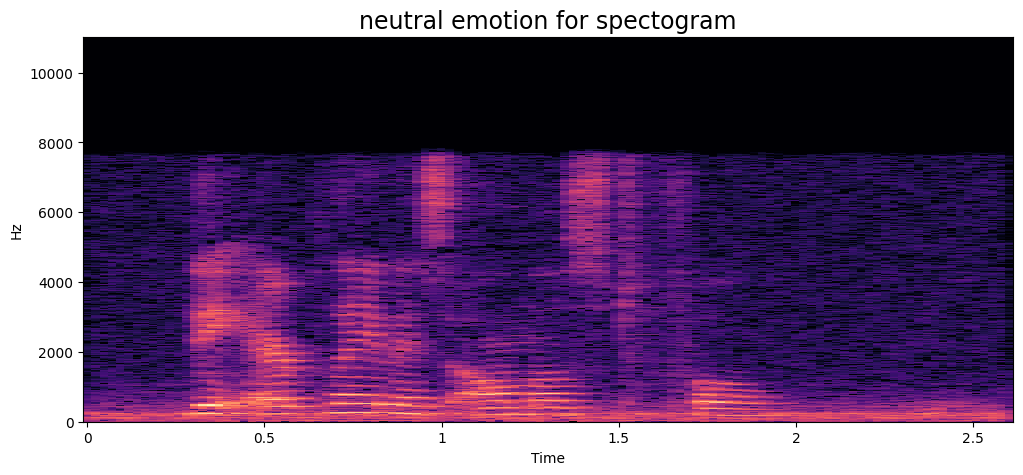

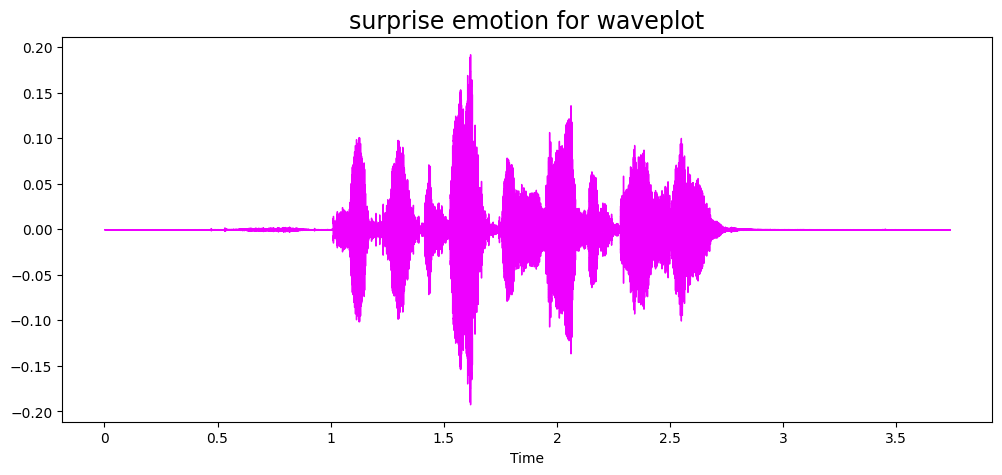

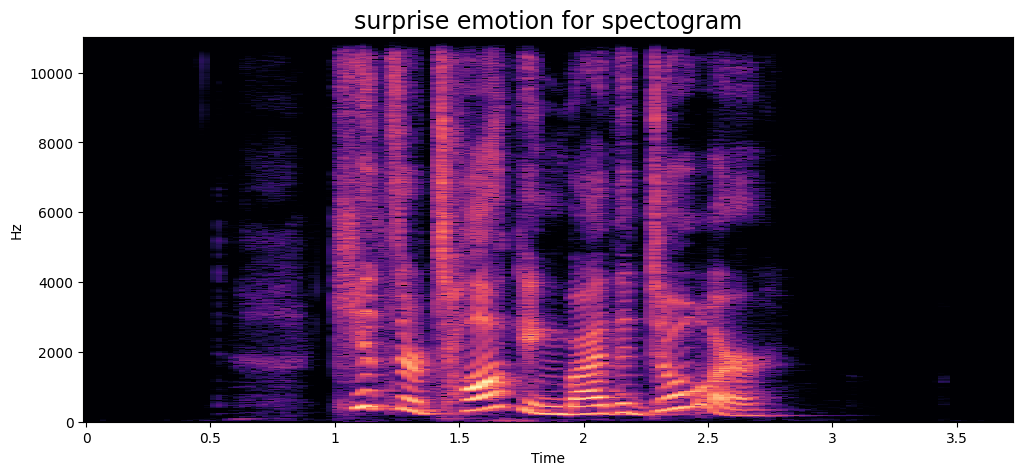

In [27]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)


In [28]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[0])

Disgust Audio Sample



In [29]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[1])

Happy Audio Sample



In [30]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[2])

Sad Audio Sample



In [31]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[3])

Neutral Audio Sample



In [32]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[4])

Fear Audio Sample



In [33]:
data,sr=librosa.load(audio_path[6])

In [34]:
def zcr(data,frame_length=2048,hop_length=512):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse_values = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_values)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_values = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_values.T) if not flatten else np.ravel(mfcc_values.T)


def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [35]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    data,sr=librosa.load(path,duration=2.5,offset=0.6)
    aud=extract_features(data,sr)
#     print(features)
    if index%500==0:
        print(f'{index} audio has been processed')
#     for i in aud:
    X.append(aud)
    Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


In [36]:
len(X)


12162

In [37]:
processed_data_path='./processed_data.csv'

In [38]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.027832,0.043457,0.053711,0.048828,0.040527,0.038574,0.037109,0.038574,0.046875,0.051758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
1,0.240234,0.345703,0.394531,0.325684,0.229492,0.152344,0.128418,0.112793,0.108398,0.106934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,angry
2,0.039062,0.095703,0.191406,0.298828,0.364258,0.408203,0.347168,0.247070,0.161621,0.073730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
3,0.065918,0.100586,0.127441,0.127930,0.125977,0.120117,0.120117,0.094727,0.089355,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
4,0.047363,0.071777,0.096680,0.104980,0.100586,0.093750,0.088867,0.083496,0.074219,0.078613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
5,0.036133,0.048340,0.060547,0.068848,0.071289,0.074219,0.071777,0.056641,0.053223,0.050781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
6,0.013184,0.019043,0.040039,0.070801,0.098633,0.131348,0.151367,0.149414,0.141602,0.141602,...,-0.177815,2.296138,-4.686413,-2.303352,-3.257248,-4.660524,-8.859943,-6.792827,0.115185,angry
7,0.101562,0.160645,0.207520,0.192871,0.161621,0.107422,0.076172,0.054688,0.057617,0.074219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
8,0.033203,0.065430,0.084473,0.089355,0.088379,0.070801,0.071777,0.162598,0.258789,0.361816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
9,0.048340,0.071777,0.092285,0.088379,0.078125,0.069824,0.063477,0.060547,0.057617,0.061035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust


In [39]:
df=pd.read_csv(processed_data_path)
df.shape

(12162, 2377)

In [40]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(12162, 2377)

In [41]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [44]:
from keras.utils import to_categorical

In [45]:
lb = LabelEncoder()
Y = to_categorical(lb.fit_transform(main_df['Emotion']))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9729, 2376), (2433, 2376), (9729, 7), (2433, 7))

In [47]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [48]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [49]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((8756, 2376, 1), (2433, 2376, 1), (973, 2376, 1))

In [50]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [51]:
EPOCH=50
BATCH_SIZE=64

In [52]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [53]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/50
137/137 [==============================] - ETA: 0s - loss: 1.6855 - accuracy: 0.3922

137/137 [==============================] - 62s 326ms/step - loss: 1.6855 - accuracy: 0.3922 - val_loss: 3.1386 - val_accuracy: 0.1696 - lr: 0.0010
Epoch 2/50
137/137 [==============================] - ETA: 0s - loss: 1.2947 - accuracy: 0.5009

137/137 [==============================] - 42s 304ms/step - loss: 1.2947 - accuracy: 0.5009 - val_loss: 4.1064 - val_accuracy: 0.1757 - lr: 0.0010
Epoch 3/50
137/137 [==============================] - ETA: 0s - loss: 1.1830 - accuracy: 0.5412

137/137 [==============================] - 42s 308ms/step - loss: 1.1830 - accuracy: 0.5412 - val_loss: 2.4654 - val_accuracy: 0.2425 - lr: 0.0010
Epoch 4/50
137/137 [==============================] - ETA: 0s - loss: 1.0990 - accuracy: 0.5761

137/137 [==============================] - 43s 312ms/step - loss: 1.0990 - accuracy: 0.5761 - val_loss: 1.7320 - val_accuracy: 0.3834 - lr: 0.0010
Epoch 5/50
137/137 [==============================] - ETA: 0s - loss: 1.0222 - accuracy: 0.6054

137/137 [==============================] - 43s 315ms/step - loss: 1.0222 - accuracy: 0.6054 - val_loss: 1.3709 - val_accuracy: 0.4861 - lr: 0.0010
Epoch 6/50
137/137 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.6259

137/137 [==============================] - 43s 314ms/step - loss: 0.9595 - accuracy: 0.6259 - val_loss: 1.1592 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 7/50
137/137 [==============================] - ETA: 0s - loss: 0.9028 - accuracy: 0.6522

137/137 [==============================] - 43s 316ms/step - loss: 0.9028 - accuracy: 0.6522 - val_loss: 1.1944 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 8/50
137/137 [==============================] - ETA: 0s - loss: 0.8598 - accuracy: 0.6717

137/137 [==============================] - 43s 315ms/step - loss: 0.8598 - accuracy: 0.6717 - val_loss: 1.4160 - val_accuracy: 0.5087 - lr: 0.0010
Epoch 9/50
137/137 [==============================] - ETA: 0s - loss: 0.8138 - accuracy: 0.6907

137/137 [==============================] - 43s 316ms/step - loss: 0.8138 - accuracy: 0.6907 - val_loss: 1.1793 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 10/50
137/137 [==============================] - ETA: 0s - loss: 0.7197 - accuracy: 0.7280

137/137 [==============================] - 43s 315ms/step - loss: 0.7197 - accuracy: 0.7280 - val_loss: 1.2813 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 11/50
137/137 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.7473

137/137 [==============================] - 43s 316ms/step - loss: 0.6719 - accuracy: 0.7473 - val_loss: 1.2849 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 12/50
137/137 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.7806

137/137 [==============================] - 43s 316ms/step - loss: 0.5922 - accuracy: 0.7806 - val_loss: 1.3084 - val_accuracy: 0.5766 - lr: 0.0010
Epoch 13/50
137/137 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.8085

137/137 [==============================] - 43s 315ms/step - loss: 0.5183 - accuracy: 0.8085 - val_loss: 1.2837 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 14/50
137/137 [==============================] - ETA: 0s - loss: 0.4278 - accuracy: 0.8467

137/137 [==============================] - 43s 315ms/step - loss: 0.4278 - accuracy: 0.8467 - val_loss: 1.3391 - val_accuracy: 0.5848 - lr: 0.0010
Epoch 15/50
137/137 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8810

137/137 [==============================] - 43s 315ms/step - loss: 0.3420 - accuracy: 0.8810 - val_loss: 1.4870 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 16/50
137/137 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.9025

137/137 [==============================] - 43s 315ms/step - loss: 0.2926 - accuracy: 0.9025 - val_loss: 1.2768 - val_accuracy: 0.6043 - lr: 0.0010
Epoch 17/50
137/137 [==============================] - ETA: 0s - loss: 0.1916 - accuracy: 0.9400

137/137 [==============================] - 43s 315ms/step - loss: 0.1916 - accuracy: 0.9400 - val_loss: 1.4996 - val_accuracy: 0.5673 - lr: 0.0010
Epoch 18/50
137/137 [==============================] - ETA: 0s - loss: 0.1493 - accuracy: 0.9534

137/137 [==============================] - 43s 315ms/step - loss: 0.1493 - accuracy: 0.9534 - val_loss: 1.5586 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 19/50
137/137 [==============================] - ETA: 0s - loss: 0.1065 - accuracy: 0.9697

137/137 [==============================] - 43s 316ms/step - loss: 0.1065 - accuracy: 0.9697 - val_loss: 1.7020 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 20/50
137/137 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 0.9745

137/137 [==============================] - 43s 315ms/step - loss: 0.0921 - accuracy: 0.9745 - val_loss: 1.5425 - val_accuracy: 0.5725 - lr: 0.0010
Epoch 21/50
137/137 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.9853

137/137 [==============================] - 43s 315ms/step - loss: 0.0670 - accuracy: 0.9853 - val_loss: 1.6254 - val_accuracy: 0.6084 - lr: 0.0010
Epoch 22/50
137/137 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9834

137/137 [==============================] - 43s 316ms/step - loss: 0.0686 - accuracy: 0.9834 - val_loss: 1.8916 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 23/50
137/137 [==============================] - ETA: 0s - loss: 0.0902 - accuracy: 0.9722

137/137 [==============================] - 43s 315ms/step - loss: 0.0902 - accuracy: 0.9722 - val_loss: 1.8897 - val_accuracy: 0.5951 - lr: 0.0010
Epoch 24/50
137/137 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9690

137/137 [==============================] - 43s 315ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 1.7512 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 25/50
137/137 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9752

137/137 [==============================] - 43s 315ms/step - loss: 0.0820 - accuracy: 0.9752 - val_loss: 1.7188 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 26/50
137/137 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9872

137/137 [==============================] - 43s 315ms/step - loss: 0.0506 - accuracy: 0.9872 - val_loss: 1.8096 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 27/50
137/137 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9927

137/137 [==============================] - 43s 315ms/step - loss: 0.0330 - accuracy: 0.9927 - val_loss: 1.9212 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 28/50
137/137 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9944

137/137 [==============================] - 43s 315ms/step - loss: 0.0241 - accuracy: 0.9944 - val_loss: 1.8553 - val_accuracy: 0.6136 - lr: 0.0010
Epoch 29/50
137/137 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9890

137/137 [==============================] - 43s 315ms/step - loss: 0.0445 - accuracy: 0.9890 - val_loss: 2.2227 - val_accuracy: 0.5406 - lr: 0.0010
Epoch 30/50
137/137 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9722

137/137 [==============================] - 43s 315ms/step - loss: 0.0874 - accuracy: 0.9722 - val_loss: 2.2901 - val_accuracy: 0.5612 - lr: 0.0010
Epoch 31/50
137/137 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9689

137/137 [==============================] - 43s 315ms/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 2.1102 - val_accuracy: 0.5457 - lr: 0.0010
Epoch 32/50
137/137 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9748

137/137 [==============================] - 43s 315ms/step - loss: 0.0761 - accuracy: 0.9748 - val_loss: 1.9097 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 33/50
137/137 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9829

137/137 [==============================] - 43s 315ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 2.0939 - val_accuracy: 0.5889 - lr: 0.0010
Epoch 34/50
137/137 [==============================] - ETA: 0s - loss: 0.0519 - accuracy: 0.9838

137/137 [==============================] - 43s 315ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 1.9644 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 35/50
137/137 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9880

137/137 [==============================] - 43s 315ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 1.9119 - val_accuracy: 0.5930 - lr: 0.0010
Epoch 36/50
137/137 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9939

137/137 [==============================] - 43s 315ms/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 2.0195 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 37/50
137/137 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9958

137/137 [==============================] - 43s 316ms/step - loss: 0.0173 - accuracy: 0.9958 - val_loss: 1.9396 - val_accuracy: 0.6115 - lr: 0.0010
Epoch 38/50
137/137 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9967

137/137 [==============================] - 43s 315ms/step - loss: 0.0146 - accuracy: 0.9967 - val_loss: 2.2493 - val_accuracy: 0.6033 - lr: 0.0010
Epoch 39/50
137/137 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9978

137/137 [==============================] - 43s 315ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 2.2454 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 40/50
137/137 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9971

137/137 [==============================] - 43s 316ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 2.4085 - val_accuracy: 0.5848 - lr: 0.0010
Epoch 41/50
137/137 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9967

137/137 [==============================] - 43s 315ms/step - loss: 0.0168 - accuracy: 0.9967 - val_loss: 2.1238 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 42/50
137/137 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9898

137/137 [==============================] - 43s 316ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 2.1574 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 43/50
137/137 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.9591

137/137 [==============================] - 43s 315ms/step - loss: 0.1209 - accuracy: 0.9591 - val_loss: 2.8255 - val_accuracy: 0.5026 - lr: 0.0010
Epoch 44/50
137/137 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9262

137/137 [==============================] - 43s 315ms/step - loss: 0.2325 - accuracy: 0.9262 - val_loss: 2.2666 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 45/50
137/137 [==============================] - ETA: 0s - loss: 0.0907 - accuracy: 0.9697

137/137 [==============================] - 43s 315ms/step - loss: 0.0907 - accuracy: 0.9697 - val_loss: 2.0423 - val_accuracy: 0.5581 - lr: 0.0010
Epoch 46/50
137/137 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9903

137/137 [==============================] - 43s 315ms/step - loss: 0.0347 - accuracy: 0.9903 - val_loss: 2.2402 - val_accuracy: 0.5673 - lr: 0.0010
Epoch 47/50
137/137 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9962

137/137 [==============================] - 43s 315ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 1.9593 - val_accuracy: 0.5982 - lr: 0.0010
Epoch 48/50
137/137 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9985

137/137 [==============================] - 43s 315ms/step - loss: 0.0104 - accuracy: 0.9985 - val_loss: 2.0847 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 49/50
137/137 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9991

137/137 [==============================] - 44s 319ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 2.0470 - val_accuracy: 0.6136 - lr: 0.0010
Epoch 50/50
137/137 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9995

137/137 [==============================] - 44s 319ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 1.9845 - val_accuracy: 0.6156 - lr: 0.0010


In [54]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

In [55]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

In [56]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

77/77 [==============================] - 4s 44ms/step


array([6, 3, 3, ..., 3, 5, 5])

In [57]:
y_check=np.argmax(y_test,axis=1)
y_check

array([6, 2, 3, ..., 2, 5, 2])

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

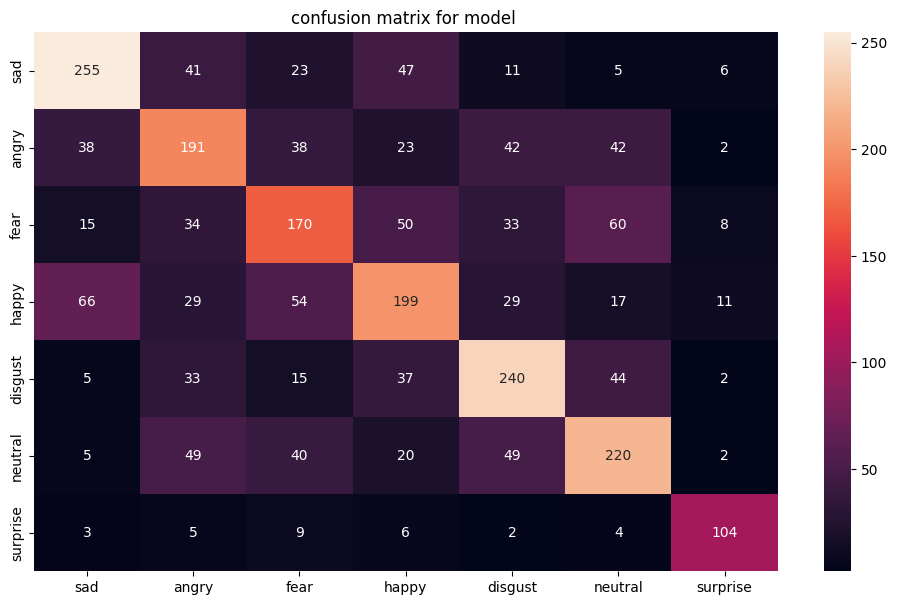

In [58]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [59]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

         sad       0.66      0.66      0.66       388
       angry       0.50      0.51      0.50       376
        fear       0.49      0.46      0.47       370
       happy       0.52      0.49      0.51       405
     disgust       0.59      0.64      0.61       376
     neutral       0.56      0.57      0.57       385
    surprise       0.77      0.78      0.78       133

    accuracy                           0.57      2433
   macro avg       0.58      0.59      0.59      2433
weighted avg       0.57      0.57      0.57      2433



In [60]:
model_path = "./res_model.h5"

model.save(model_path)